# Base de propinas

* Objeto a estudiar: cantidad de propinas.
    * tips: Cantidad de propinas
* Atributos de nuestra base de datos:
    * sex: Sexo del camarero/a. String.
    * total_bill: Total cuenta consumo
   

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import seaborn as sns
import statsmodels.api as statm
import statsmodels.formula.api as frm

/home/usuario/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Vamos a importar nuestro csv
df = pd.read_csv('./tips.csv')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.sex.value_counts() / len(df)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [12]:
df.smoker.value_counts() / len(df)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [13]:
df.day.value_counts() / len(df)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [14]:
df.time.value_counts() / len(df)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [15]:
df.sex.replace(['Female', 'Male'], [1, 0], inplace=True)

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4


In [17]:
df.smoker.replace(['No', 'Yes'], [0, 1], inplace=True)

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [22]:
#Ahora vamos por los graficos

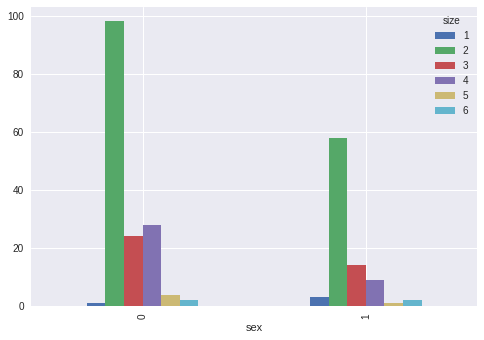

In [27]:
cross = pd.crosstab(df['sex'], df['size'])
cross.plot(kind = 'bar')

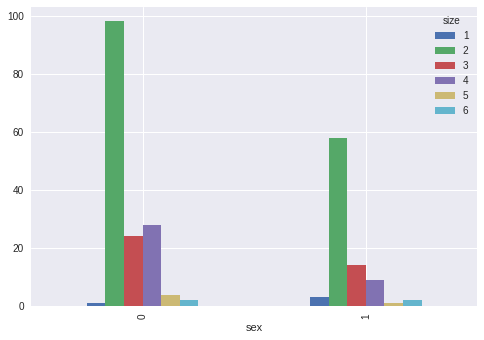

In [30]:
cross_2 = pd.crosstab(df['sex'], df['smoker'])
cross.plot(kind = 'bar')

In [31]:
matrix_corr = df.corr()
matrix_corr

,total_bill,tip,sex,smoker,size
total_bill,1.000000,0.675734,-0.144877,0.085721,0.598315
tip,0.675734,1.000000,-0.088862,0.005929,0.489299
sex,-0.144877,-0.088862,1.000000,-0.002816,-0.086195
smoker,0.085721,0.005929,-0.002816,1.000000,-0.133178
size,0.598315,0.489299,-0.086195,-0.133178,1.000000


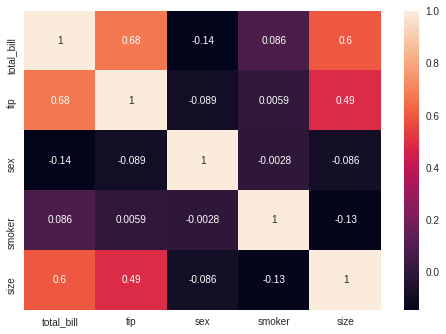

In [32]:
sns.heatmap(matrix_corr, annot= True)

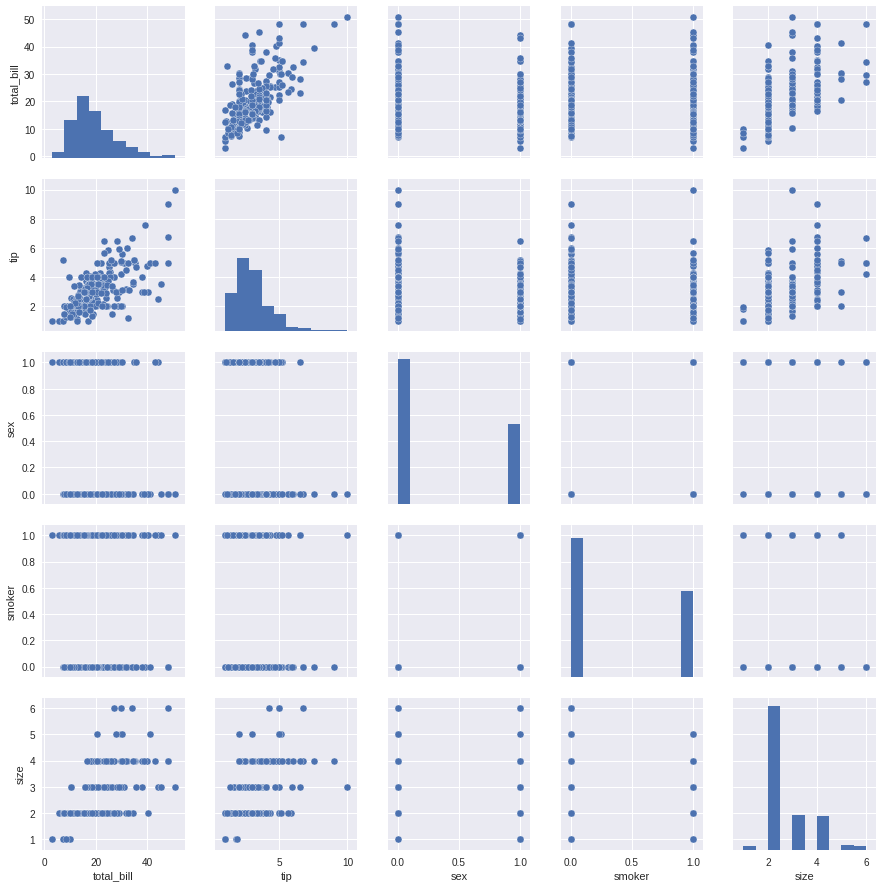

In [33]:
sns.pairplot(df)

In [36]:
model_1 = frm.ols('tip ~ total_bill',  data=df)

In [38]:
model_1 = model_1.fit()

In [39]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           6.69e-34
Time:                        12:44:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""